In [2]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 4.9 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 768.9/768.9 kB 5.0 MB/s eta 0:00:00a 0:00:01


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import string
import seaborn as sns
import time

# nltk
import nltk
from nltk.corpus import stopwords
stoplist= stopwords.words('english')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer= WordNetLemmatizer()
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

# Enable logging
import logging
logging.basicConfig(level= logging.INFO)


In [43]:
with open('../quint/data/sample_texts/goog_joe_rogan_tr.txt') as f:
    doc = f.readlines()

In [44]:
doc = doc[0]
doc = doc.replace("you'll", "you will")
doc = doc.replace("you're", "you are")
doc = doc.replace("?", ".")

sentences = doc.split('. ')

In [45]:
data = pd.DataFrame({'text':sentences})

In [46]:
import string
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
import re


def preprocessing(sentence):
    emails = re.findall('[\w.+-]+@[\w-]+\.[\w.-]+', sentence)
    for each in emails:
        sentence = sentence.replace(each, '')
    sentence = ''.join([each for each in sentence if each not in string.punctuation])
    sentence = sentence.lower()
    sentence = ''.join(char for char in sentence if not char.isdigit())
    tokenized_sentence = word_tokenize(sentence)
    stop_words = set(stopwords.words('english'))
    return ' '.join([WordNetLemmatizer().lemmatize(word, pos = "v") for word in tokenized_sentence if word not in stop_words])

def preprocessing_(sentence):
    emails = re.findall('[\w.+-]+@[\w-]+\.[\w.-]+', sentence)
    for each in emails:
        sentence = sentence.replace(each, '')
    sentence = ''.join([each for each in sentence if each not in string.punctuation])
    sentence = sentence.lower()
    sentence = ''.join(char for char in sentence if not char.isdigit())
    tokenized_sentence = word_tokenize(sentence)
    stop_words = set(stopwords.words('english'))
    return [WordNetLemmatizer().lemmatize(word, pos = "v") for word in tokenized_sentence if word not in stop_words]

In [47]:
data['text'] = data['text'].apply(preprocessing)  
data['text_'] = data['text'].apply(preprocessing_)  

In [155]:
data['text_'] 

0                            [okay, thatll, professional]
1                [know, people, like, live, things, like]
2                         [theyre, take, money, russians]
3                     [course, answer, live, like, speak]
4       [im, dont, youtube, channel, know, im, joe, ro...
                              ...                        
1715                                   [dont, stay, safe]
1716                                         [stay, safe]
1717        [open, stay, stay, free, open, possibilities]
1718                                         [take, care]
1719                                         [take, care]
Name: text_, Length: 1720, dtype: object

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 1), max)
vectorized_documents = vectorizer.fit_transform(data['text'])
vectorized_documents = pd.DataFrame(vectorized_documents.toarray(), 
                                    columns = vectorizer.get_feature_names_out())

In [50]:
#!pip install gensim

In [ ]:
from gensim.models import Word2Vec
word2vec = Word2Vec(sentences=data['text_'], vector_size=3, min_count=7, window=10)
wv = word2vec.wv


In [108]:
def embed_sentence(word2vec, sentence):
    wv = word2vec.wv
    
    return np.array([wv[each] for each in sentence if each in wv.key_to_index.keys()])

embedded_sentence = embed_sentence(word2vec, data['text_'][0])

In [128]:
embedded = [embed_sentence(word2vec, each) for each in data['text_']]
np.max([len(each) for each in embedded])

41

In [163]:
from keras_preprocessing import pad_embedded

ImportError: cannot import name 'pad_embedded' from 'keras_preprocessing' (/home/poloniki/.pyenv/versions/3.8.12/envs/quint/lib/python3.8/site-packages/keras_preprocessing/__init__.py)

In [164]:
import gensim.downloader as api
#print(list(api.info()['models'].keys()))
word2vec_transfer = api.load('glove-wiki-gigaword-50')

INFO:gensim.models.keyedvectors:loading projection weights from /home/poloniki/gensim-data/glove-wiki-gigaword-50/glove-wiki-gigaword-50.gz
INFO:gensim.utils:KeyedVectors lifecycle event {'msg': 'loaded (400000, 50) matrix of type float32 from /home/poloniki/gensim-data/glove-wiki-gigaword-50/glove-wiki-gigaword-50.gz', 'binary': False, 'encoding': 'utf8', 'datetime': '2022-08-30T15:10:10.071541', 'gensim': '4.2.0', 'python': '3.8.12 (default, Jul  7 2022, 10:25:45) \n[GCC 9.4.0]', 'platform': 'Linux-5.10.16.3-microsoft-standard-WSL2-x86_64-with-glibc2.29', 'event': 'load_word2vec_format'}


In [156]:
# Function to convert a sentence (list of words) into a matrix representing the words in the embedding space
def embed_sentence_with_TF(word2vec, sentence):
    embedded_sentence = []
    for word in sentence:
        if word in word2vec:
            embedded_sentence.append(word2vec[word])
        
    return np.array(embedded_sentence)

# Function that converts a list of sentences into a list of matrices
def embedding(word2vec, sentences):
    embed = []
    
    for sentence in sentences:
        embedded_sentence = embed_sentence_with_TF(word2vec, sentence)
        embed.append(embedded_sentence)
        
    return embed

# Embed the training and test sentences
X_train_embed_2 = embedding(word2vec_transfer, data['text_'])


In [178]:
dummy_array  = X_train_embed_2[:50]
with open('test.npy', 'wb') as f:
    np.save(f, dummy_array)


In [171]:
word2vec_transfer['abandon']

array([ 0.45643 , -0.50179 ,  0.082902, -0.72677 , -0.36292 , -0.02104 ,
       -0.16775 ,  0.62528 , -0.25954 ,  0.28172 ,  0.11429 ,  0.12264 ,
        0.017224, -0.15812 , -0.15055 ,  0.99115 ,  0.48335 ,  0.19811 ,
        0.43616 , -0.14657 ,  0.27988 ,  0.30046 , -0.52932 , -0.19341 ,
        0.35988 , -1.67    ,  0.28788 , -0.36604 ,  0.86341 ,  0.094299,
        1.6779  ,  0.31896 , -1.5577  ,  0.05241 , -0.23253 , -0.34323 ,
       -0.14053 , -0.27081 , -0.9407  , -0.52684 , -0.18008 , -0.92153 ,
        0.38129 ,  0.023647,  0.37584 , -0.05727 , -0.3006  ,  0.38323 ,
       -0.35547 , -0.14419 ], dtype=float32)

In [170]:
vectorized_documents

,abandon,abdicate,ability,able,absolute,absolutely,abujihad,abuse,abusive,aby,...,years,yes,yet,york,youll,young,youngest,youre,youtube,youve
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.327718,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1716,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1717,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1718,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [118]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
#pca.fit(vectorized_documents)
pca.fit(pad_embedded)

data_projected = pca.transform(vectorized_documents)

ValueError: Found array with dim 3. PCA expected <= 2.

In [15]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()

In [61]:
data['len'] = data['text'].apply(lambda x: len(x))
data['len_cum'] = data['len'].cumsum()
data

,text,text_,label,len,len_cum
0,okay thatll professional,"[okay, thatll, professional]",5,24,24
1,know people like live things like,"[know, people, like, live, things, like]",6,33,57
2,theyre take money russians,"[theyre, take, money, russians]",2,26,83
3,course answer live like speak,"[course, answer, live, like, speak]",6,29,112
4,im dont youtube channel know im joe rogan give...,"[im, dont, youtube, channel, know, im, joe, ro...",11,80,192
...,...,...,...,...,...
1715,dont stay safe,"[dont, stay, safe]",5,14,85944
1716,stay safe,"[stay, safe]",5,9,85953
1717,open stay stay free open possibilities,"[open, stay, stay, free, open, possibilities]",5,38,85991
1718,take care,"[take, care]",5,9,86000


In [62]:
data['len_cum'] = minmax.fit_transform(data[['len_cum']])

In [63]:
pca_df = pd.DataFrame(data_projected)
pca_df['position'] = data['len_cum']

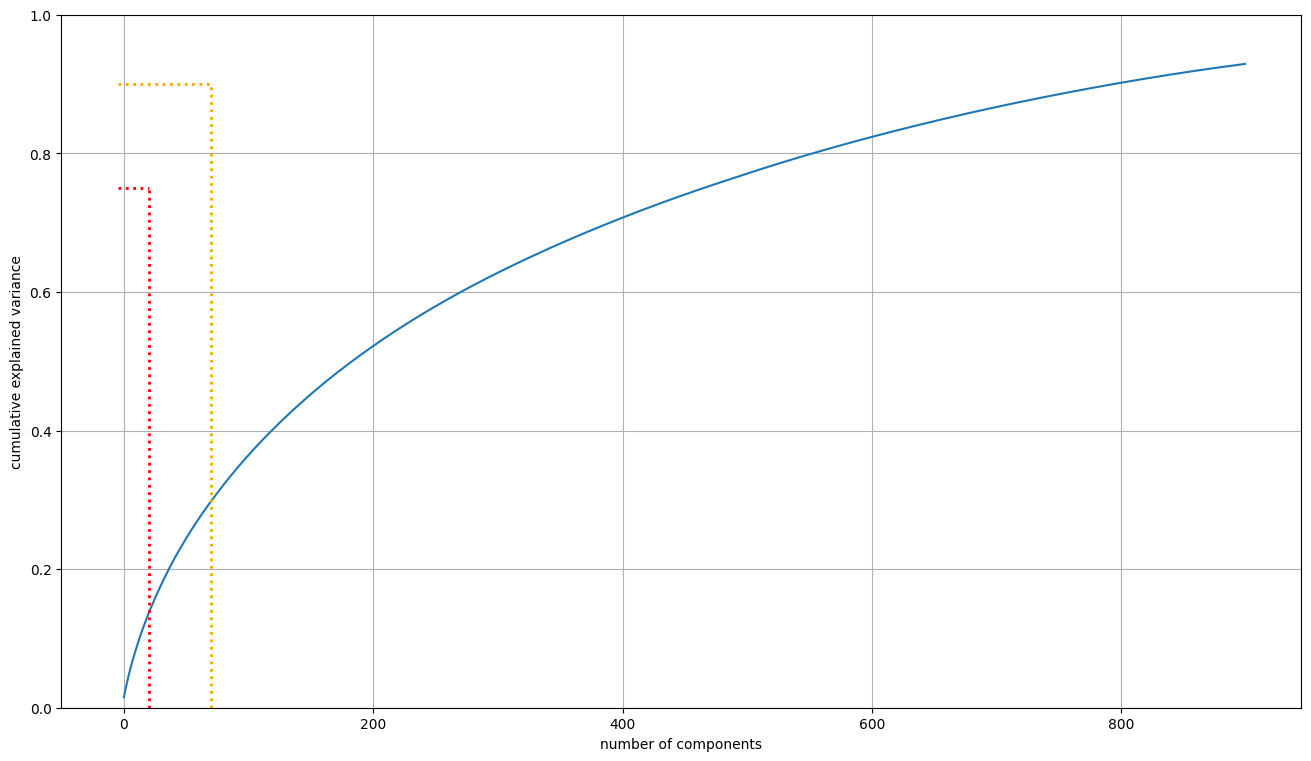

In [53]:
plt.figure(figsize=(16, 9))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.grid()
#plt.xlim((-5, 151))
plt.ylim((0, 1))
plt.hlines(y=[.75, .9], xmin=[-5, -5], xmax=[20, 70],
           linestyles='dotted', colors=['red', 'orange'], linewidth=2)
plt.vlines(x=[20, 70], ymin=[0, 0], ymax=[.75, .9],
           linestyles='dotted', colors=['red', 'orange'], linewidth=2);

Text(0.5, 0, 'k cluster number')

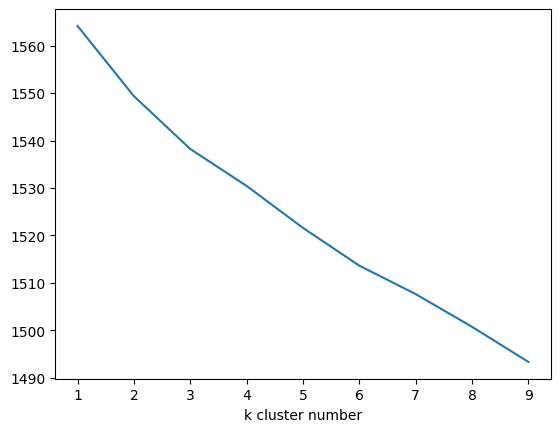

In [54]:
from sklearn.cluster import KMeans
inertias = []
ks = range(1,10)

for k in ks:
    km_test = KMeans(n_clusters=k).fit(data_projected)
    inertias.append(km_test.inertia_)

plt.plot(ks, inertias)
plt.xlabel('k cluster number')

In [55]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=12)
km.fit(data_projected)

KMeans(n_clusters=12)

In [179]:
data['label'] =  km.predict(data_projected)
round(data.label.value_counts(normalize=True),2)
data

,text,text_,label,len,len_cum
0,okay thatll professional,"[okay, thatll, professional]",5,24,0.000000
1,know people like live things like,"[know, people, like, live, things, like]",6,33,0.000384
2,theyre take money russians,"[theyre, take, money, russians]",2,26,0.000686
3,course answer live like speak,"[course, answer, live, like, speak]",6,29,0.001023
4,im dont youtube channel know im joe rogan give...,"[im, dont, youtube, channel, know, im, joe, ro...",11,80,0.001954
...,...,...,...,...,...
1715,dont stay safe,"[dont, stay, safe]",5,14,0.999244
1716,stay safe,"[stay, safe]",5,9,0.999349
1717,open stay stay free open possibilities,"[open, stay, stay, free, open, possibilities]",5,38,0.999791
1718,take care,"[take, care]",5,9,0.999895


In [65]:
data_cleaned = data.copy()

In [66]:
data_cleaned['row'] = sentences

<AxesSubplot:xlabel='label', ylabel='len_cum'>

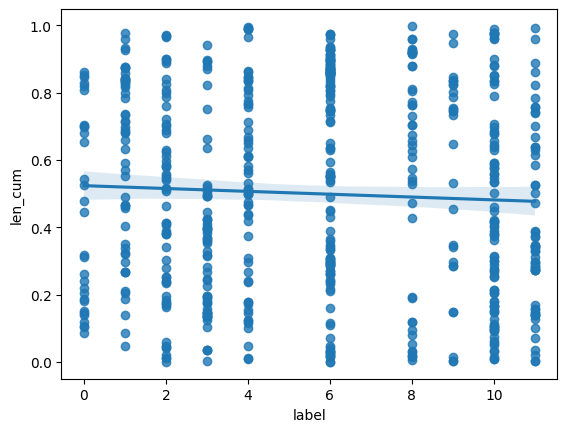

In [67]:
data_cleaned = data_cleaned.loc[data.label != 5]
data_cleaned = data_cleaned.loc[data.label != 7]

#data_cleaned.groupby('label').agg({'text':len})


sns.regplot(data =data_cleaned, x='label', y='len_cum')

<AxesSubplot:xlabel='label'>

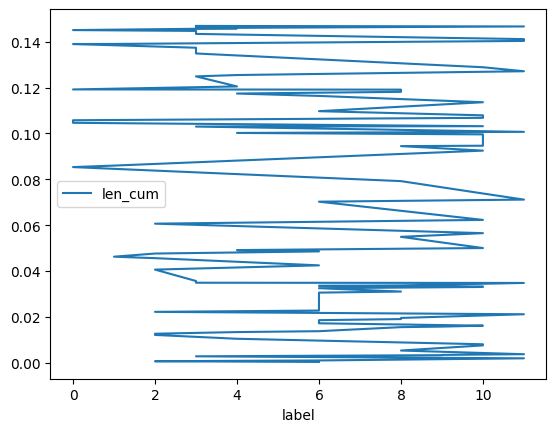

In [69]:
data_cleaned[['len_cum', 'label']].head(100).plot('label')

<AxesSubplot:xlabel='rolling'>

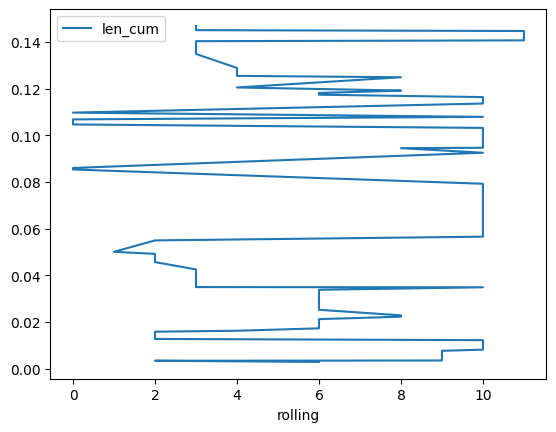

In [95]:
from scipy.stats import mode


data_cleaned['rolling'] = data_cleaned['label'].rolling(5).apply(lambda x: mode(x)[0])
data_cleaned[['len_cum', 'rolling']].head(100).plot('rolling')

In [96]:
data_cleaned['rolling'].iloc[0]

nan

In [97]:
data_cleaned[['row', 'rolling']]

text = ''
for num, each in enumerate(data_cleaned['row']):
    if data_cleaned['rolling'].iloc[num] != data_cleaned['rolling'].iloc[num-1]:
        text+=f' \n \n  {each}. '
    else:
        text+=f'{each}. '
    
print(text)

 
 
  You know people are like how do you live and things like that.  
 
  They're taking money from the Russians.  
 
  And of course the answer is no but I I do this for a living like I speak.  
 
  I'm I don't have a YouTube channel that where it's you know, I'm Joe Rogan, but I give speeches at universities and things like that.  
 
  Would that work.  
 
  If yeah, like I I mean if you introduce me so like I get followers.  
 
  Yeah, we could do that. I'm all in that that could absolutely happen. So I I came on because I just written a book called permanent record, which is the story of my life because that's what Publishers make you do when you are writing your first book, but it's more than that because I didn't just want to talk about me. Because they don't want to see books like this get ridden.  
 
  They especially don't want to see books like this get red. We didn't know where where that's going on government is still pursuing that case quite strongly. They're more focused

In [98]:
from sklearn.decomposition import LatentDirichletAllocation

# Instantiate the LDA 
n_components = 10
model = LatentDirichletAllocation(n_components=n_components, max_iter = 100)

# Fit the LDA on the vectorized documents
model.fit(vectorized_documents)

LatentDirichletAllocation(max_iter=100)

In [99]:
document_topic_mixture = model.transform(vectorized_documents)
topic_word_mixture = pd.DataFrame(model.components_, 
                                 columns = vectorizer.get_feature_names_out())
topic_word_mixture

,abandon,abandon traditional,abandon traditional constitutional,abandon traditional constitutional restraints,abandon traditional political,abandon traditional political restraints,abdicate,abdicate role,abdicate role police,abdicate role police executive,...,youve never hear need,youve sell,youve sell information,youve sell information foreign,youve talk,youve talk return,youve talk return home,youve work,youve work government,youve work government work
0,0.312537,0.312537,0.206268,0.206268,0.206268,0.206268,0.10000,0.10000,0.10000,0.10000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
1,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.10000,0.10000,0.10000,0.10000,...,0.100000,0.100000,0.100000,0.100000,0.207607,0.207607,0.207607,0.100000,0.100000,0.100000
2,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.10000,0.10000,0.10000,0.10000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
3,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.10000,0.10000,0.10000,0.10000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
4,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.10000,0.10000,0.10000,0.10000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
5,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.10000,0.10000,0.10000,0.10000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
6,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.10000,0.10000,0.10000,0.10000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
7,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.23285,0.23285,0.23285,0.23285,...,0.256693,0.223335,0.223335,0.223335,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
8,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.10000,0.10000,0.10000,0.10000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000
9,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.10000,0.10000,0.10000,0.10000,...,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.163556,0.163556,0.163556


In [100]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])


In [72]:
#print_topics(model, vectorizer)

In [156]:
#example = ["okay thatll professional"]
example = list(data['text'])
example = vectorizer.transform(example)
results = model.transform(example)#.max(axis=1)

In [161]:
labels = [list(each).index(each.max()) for each in results]


In [129]:
example[0]

<1x31643 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [142]:
def get_label(text):
    text = [text]
    text = vectorizer.transform(text)
    model.transform(text)
    transformed = model.transform(text)
    print(transformed)
    maximum = transformed.max()
    result = list(transformed[0]).index(maximum)
    return result
    

In [143]:
get_label(example[0])

AttributeError: lower not found

In [162]:
data['new_labels'] = labels

In [165]:
data['new_labels'].value_counts(normalize=True)

3    0.108506
8    0.107837
7    0.106497
1    0.105157
0    0.103148
9    0.099799
2    0.099129
5    0.093771
4    0.093771
6    0.082384
Name: new_labels, dtype: float64

In [166]:
data

,text,label,new_labels
0,okay thatll professional,1,5
1,know people like live things like theyre take ...,29,1
2,course answer live like speak,3,2
3,im dont youtube channel know im joe rogan give...,4,8
4,lot interview record right set cool,1,6
...,...,...,...
1488,dont stay safe,2,3
1489,stay safe,2,3
1490,open stay stay free open possibilities,1,7
1491,take care,15,0
